In [34]:
import numpy as np
import pandas as pd

employ_df = pd.read_csv('./datasets/employment_rate.csv')
employ_df

,성별,연령계층별,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,계,20 - 29세,3619,3664,3660,3699,3747,3601,3706,3818,3736,3612
1,계,30 - 39세,5729,5672,5643,5582,5529,5364,5257,5303,5357,5447


In [35]:
employ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      2 non-null      object
 1   연령계층별   2 non-null      object
 2   2015    2 non-null      int64 
 3   2016    2 non-null      int64 
 4   2017    2 non-null      int64 
 5   2018    2 non-null      int64 
 6   2019    2 non-null      int64 
 7   2020    2 non-null      int64 
 8   2021    2 non-null      int64 
 9   2022    2 non-null      int64 
 10  2023    2 non-null      int64 
 11  2024    2 non-null      int64 
dtypes: int64(10), object(2)
memory usage: 320.0+ bytes


In [36]:
employ_df.drop(labels=['성별'], axis=1, inplace=True)

In [37]:
employ_df

,연령계층별,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,20 - 29세,3619,3664,3660,3699,3747,3601,3706,3818,3736,3612
1,30 - 39세,5729,5672,5643,5582,5529,5364,5257,5303,5357,5447


In [38]:
employ_df = employ_df.rename(columns={'연령계층별': 'age'})
employ_df

,age,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,20 - 29세,3619,3664,3660,3699,3747,3601,3706,3818,3736,3612
1,30 - 39세,5729,5672,5643,5582,5529,5364,5257,5303,5357,5447


In [39]:
employ_df['age'] = employ_df['age'].replace({
    '20 - 29세': 'range_20',
    '30 - 39세': 'range_30',
})
employ_df

,age,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,range_20,3619,3664,3660,3699,3747,3601,3706,3818,3736,3612
1,range_30,5729,5672,5643,5582,5529,5364,5257,5303,5357,5447


In [40]:
employ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     2 non-null      object
 1   2015    2 non-null      int64 
 2   2016    2 non-null      int64 
 3   2017    2 non-null      int64 
 4   2018    2 non-null      int64 
 5   2019    2 non-null      int64 
 6   2020    2 non-null      int64 
 7   2021    2 non-null      int64 
 8   2022    2 non-null      int64 
 9   2023    2 non-null      int64 
 10  2024    2 non-null      int64 
dtypes: int64(10), object(1)
memory usage: 304.0+ bytes


In [41]:
employ_df = employ_df.set_index("age").T
print(employ_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 2015 to 2024
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   range_20  10 non-null     int64
 1   range_30  10 non-null     int64
dtypes: int64(2)
memory usage: 240.0+ bytes
None


In [42]:
employ_df

age,range_20,range_30
2015,3619,5729
2016,3664,5672
2017,3660,5643
2018,3699,5582
2019,3747,5529
2020,3601,5364
2021,3706,5257
2022,3818,5303
2023,3736,5357
2024,3612,5447


<Axes: title={'center': 'employmemt_range'}>

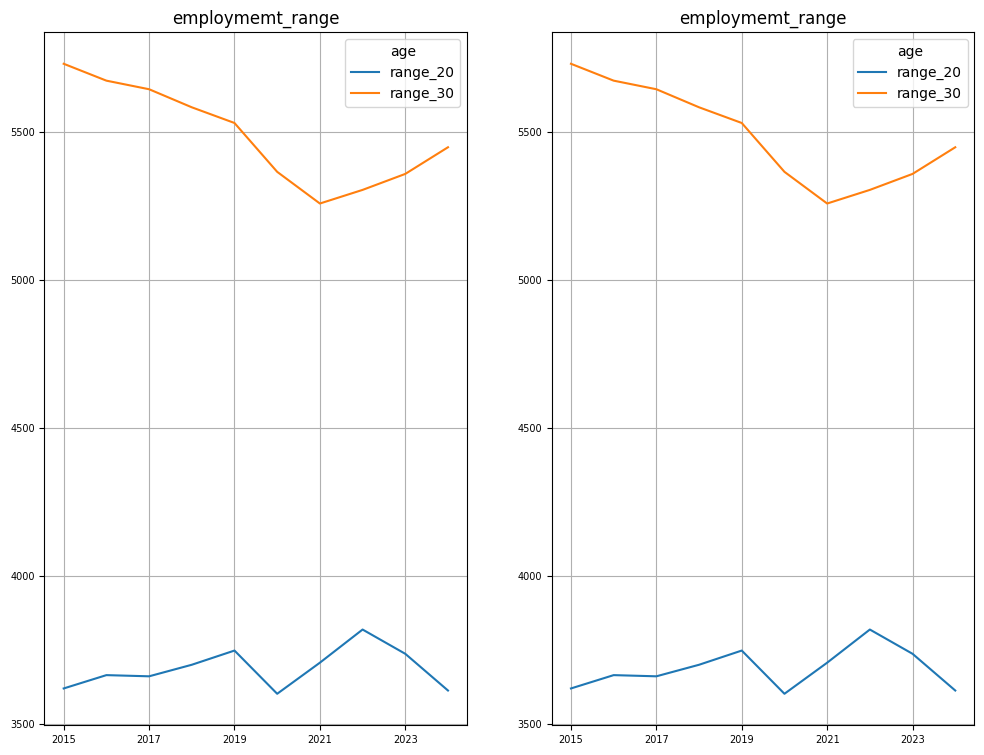

In [47]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 9))

employ_df.plot(title='employmemt_range', fontsize='7', kind='line', grid=True, ax=axes[0])
employ_df.plot(title='employmemt_range', fontsize='7', kind='line', grid=True, ax=axes[1])

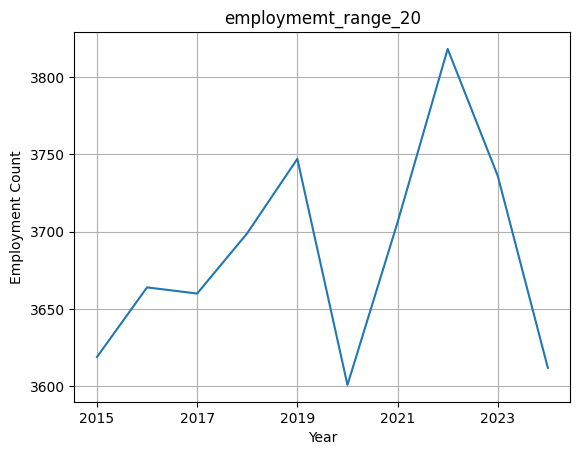

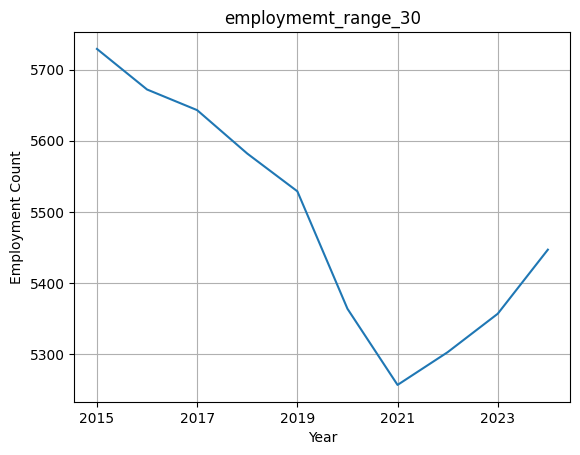

In [46]:
plt.figure()
employ_df['range_20'].plot(title='employmemt_range_20', grid=True)
plt.xlabel("Year")
plt.ylabel("Employment Count")
plt.show()

plt.figure()
employ_df['range_30'].plot(title='employmemt_range_30', grid=True)
plt.xlabel("Year")
plt.ylabel("Employment Count")
plt.show()

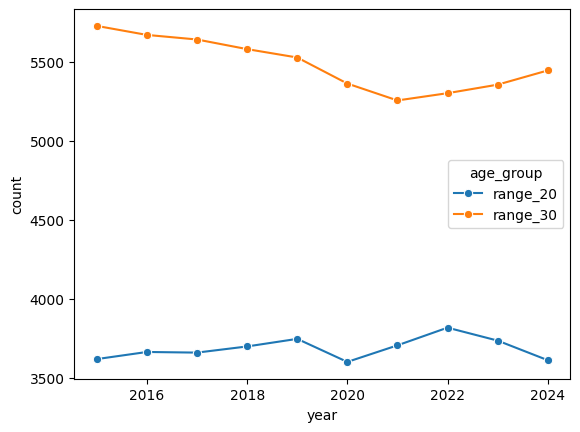

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'age': ['range_20', 'range_30'],
    2015: [3619, 5729],
    2016: [3664, 5672],
    2017: [3660, 5643],
    2018: [3699, 5582],
    2019: [3747, 5529],
    2020: [3601, 5364],
    2021: [3706, 5257],
    2022: [3818, 5303],
    2023: [3736, 5357],
    2024: [3612, 5447]
}

employ_df = pd.DataFrame(data)
employ_df = employ_df.set_index('age').T.reset_index().rename(columns={'index':'year'})

employ_df = employ_df.melt(id_vars='year', var_name='age_group', value_name='count')

sns.lineplot(data=employ_df, x='year', y='count', hue='age_group', marker='o')
plt.show()
